#Library

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprocessing

In [4]:
df_test =  pd.read_csv("/content/drive/MyDrive/pengantar analisis data/pilkada-100-uas.csv")
df_train = pd.read_csv('/content/drive/MyDrive/pengantar analisis data/pilkada-1000-uas.csv')

In [5]:
df_test

,Hasil Pilkada,Jumlah Paslon,Nama Daerah,Jalur Pencalonan,Nama Kandidat (1),Nama Kandidat (2),Gender (1),Gender (2),Usia (1),Usia (2),Latar Belakang Profesi (1),Latar Belakang Profesi (2),Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,Kalah,3,KABUPATEN TOBA SAMOSIR,PERORANGAN,"Drs. MONANG SITORUS, SH, MBA",CHRISSIE SAGITA HUTAHAEAN,L,L,60,50,SIPIL,SIPIL,0,0,0,0.000,0.000,0.000
1,Kalah,5,KABUPATEN TOJO UNA UNA,PARPOL,"MUHAMMAD SYARIF AL DJUFRY, SP","Dra. FATIMAH Hi. MOH. AMIN LASAWEDI, M.Si",L,P,34,54,SIPIL,SIPIL,0,0,2,0.167,0.214,0.200
2,Menang,5,KABUPATEN TOJO UNA UNA,PARPOL,"MOHAMMAD LAHAY, SE",ADMIN LASIMPALA,L,L,54,49,SIPIL,SIPIL,0,0,3,0.250,0.368,0.360
3,Kalah,5,KABUPATEN TOJO UNA UNA,PARPOL,"MAHMUD LAHAY, SE.,M.Si",LUCKY LASAHIDO,L,L,49,48,SIPIL,SIPIL,0,0,3,0.250,0.114,0.200
4,Kalah,5,KABUPATEN TOJO UNA UNA,PERORANGAN,"BASRIN MOHAMMAD, SE.,M.Si","BAHRUN S. MARDANI, S.Sos",L,L,59,50,SIPIL,SIPIL,0,0,0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Kalah,3,Sulawesi Selatan,PARPOL,A. Rudiyanto A.,A. Nawir P.,L,L,56,63,SIPIL,SIPIL,0,0,1,0.083,0.046,0.013
96,Kalah,4,Lampung,PARPOL,Berlian Tihang,Mukhlis Basri,L,L,54,50,SIPIL,SIPIL,0,0,4,0.333,0.286,0.253
97,Menang,4,Lampung,PARPOL,Ridho Ficardo,Bachtiar Basri,L,L,34,61,SIPIL,SIPIL,0,0,3,0.250,0.366,0.280
98,Kalah,4,Lampung,PARPOL,Herman HN,Zainudiin Hasan,L,L,58,49,SIPIL,SIPIL,0,0,1,0.083,0.082,0.093


In [6]:
df_train

,Hasil Pilkada,Jumlah Paslon,Nama Daerah,Jalur Pencalonan,Nama Kandidat (1),Nama Kandidat (2),Gender (1),Gender (2),Usia (1),Usia (2),Latar Belakang Profesi (1),Latar Belakang Profesi (2),Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,Kalah,3,Provinsi Bengkulu,PARPOL,Helmi Hasan,Muslihan DS,L,L,41,74,SIPIL,SIPIL,0,0,3,0.250,0.179,0.222
1,Menang,3,Provinsi Bengkulu,PARPOL,Rohidin Mersyah,Rosjonsyah Syahili,L,L,50,56,SIPIL,SIPIL,1,0,6,0.500,0.584,0.511
2,Kalah,3,Provinsi Bengkulu,PARPOL,Agusrin Maryono Najamuddin,Imron Rosyadi,L,L,51,59,SIPIL,SIPIL,0,0,2,0.167,0.237,0.222
3,Kalah,3,Provinsi Jambi,PARPOL,Cek Endra,Ratu Munawaroh,L,P,62,43,SIPIL,SIPIL,0,0,4,0.333,0.473,0.327
4,Kalah,3,Provinsi Jambi,PARPOL,Fachrori Umar,Syafril Nursal,L,L,68,58,SIPIL,TNI/POLRI,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Kalah,4,KOTA MOJOKERTO (JAWA TIMUR),PARPOL,WARSITO,MOELJADI,L,L,49,46,SIPIL,SIPIL,0,0,2,0.167,0.157,0.240
996,Menang,4,KOTA MOJOKERTO (JAWA TIMUR),PARPOL,"HJ. IKA PUSPITASARI, SE",ACHMAD RIZAL ZAKARIA,P,L,39,55,SIPIL,SIPIL,0,0,2,0.167,0.293,0.240
997,Menang,3,KOTA MADIUN (JAWA TIMUR),PARPOL,"DRS. H. MAIDI, SH, MM, M.PD","INDA RAYA AYU MIKO SAPUTRI, S.E., MIB",L,P,57,37,SIPIL,SIPIL,0,0,5,0.417,0.543,0.667
998,Kalah,3,KOTA MADIUN (JAWA TIMUR),PERORANGAN,DR. HARRYADIN MAHARDIKA,"ARIEF RAHMAN, S.T., M.M.",L,L,38,42,SIPIL,SIPIL,0,0,0,0.000,0.000,0.000


In [7]:
df_train.columns

Index(['Hasil Pilkada', 'Jumlah Paslon', 'Nama Daerah', 'Jalur Pencalonan',
       'Nama Kandidat (1)', 'Nama Kandidat (2)', 'Gender (1)', 'Gender (2)',
       'Usia (1)', 'Usia (2)', 'Latar Belakang Profesi (1)',
       'Latar Belakang Profesi (2)', 'Petahana? (1)', 'Petahana? (2)',
       'Jumlah PARPOL Pendukung', 'Persentase PARPOL Pendukung',
       'Jumlah Kursi Pendukung (DPR)', 'Jumlah Kursi Pendukung (DPRD)'],
      dtype='object')

In [8]:
df_train.dtypes

Hasil Pilkada                     object
Jumlah Paslon                      int64
Nama Daerah                       object
Jalur Pencalonan                  object
Nama Kandidat (1)                 object
Nama Kandidat (2)                 object
Gender (1)                        object
Gender (2)                        object
Usia (1)                           int64
Usia (2)                           int64
Latar Belakang Profesi (1)        object
Latar Belakang Profesi (2)        object
Petahana? (1)                      int64
Petahana? (2)                      int64
Jumlah PARPOL Pendukung            int64
Persentase PARPOL Pendukung      float64
Jumlah Kursi Pendukung (DPR)     float64
Jumlah Kursi Pendukung (DPRD)    float64
dtype: object

In [9]:
df_train.isna().sum()

Hasil Pilkada                    0
Jumlah Paslon                    0
Nama Daerah                      0
Jalur Pencalonan                 0
Nama Kandidat (1)                0
Nama Kandidat (2)                0
Gender (1)                       0
Gender (2)                       0
Usia (1)                         0
Usia (2)                         0
Latar Belakang Profesi (1)       0
Latar Belakang Profesi (2)       0
Petahana? (1)                    0
Petahana? (2)                    0
Jumlah PARPOL Pendukung          0
Persentase PARPOL Pendukung      0
Jumlah Kursi Pendukung (DPR)     0
Jumlah Kursi Pendukung (DPRD)    0
dtype: int64

In [10]:
df_train['Hasil Pilkada'].unique()

array(['Kalah', 'Menang'], dtype=object)

In [11]:
#Hapus Kolom yang memiliki korelasi yang kecil dengan Hasil Pilkada
df_train.drop(['Jumlah Paslon'],axis=1,inplace=True)
df_train.drop(['Nama Daerah'],axis=1,inplace=True)
df_train.drop(['Jalur Pencalonan'], axis=1, inplace=True)
df_train.drop(['Nama Kandidat (1)'], axis=1, inplace=True)
df_train.drop(['Nama Kandidat (2)'], axis=1, inplace=True)
df_train.drop(['Gender (1)'], axis=1, inplace=True)
df_train.drop(['Gender (2)'], axis=1, inplace=True)
df_train.drop(['Usia (1)'], axis=1, inplace=True)
df_train.drop(['Usia (2)'], axis=1, inplace=True)
df_train.drop(['Latar Belakang Profesi (1)'], axis=1, inplace=True)
df_train.drop(['Latar Belakang Profesi (2)'], axis=1, inplace=True)

In [12]:
df_train

,Hasil Pilkada,Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,Kalah,0,0,3,0.250,0.179,0.222
1,Menang,1,0,6,0.500,0.584,0.511
2,Kalah,0,0,2,0.167,0.237,0.222
3,Kalah,0,0,4,0.333,0.473,0.327
4,Kalah,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...,...
995,Kalah,0,0,2,0.167,0.157,0.240
996,Menang,0,0,2,0.167,0.293,0.240
997,Menang,0,0,5,0.417,0.543,0.667
998,Kalah,0,0,0,0.000,0.000,0.000


In [13]:
#Hapus Kolom yang memiliki korelasi yang kecil dengan Hasil Pilkada
df_test.drop(['Jumlah Paslon'],axis=1,inplace=True)
df_test.drop(['Nama Daerah'],axis=1,inplace=True)
df_test.drop(['Jalur Pencalonan'], axis=1, inplace=True)
df_test.drop(['Nama Kandidat (1)'], axis=1, inplace=True)
df_test.drop(['Nama Kandidat (2)'], axis=1, inplace=True)
df_test.drop(['Gender (1)'], axis=1, inplace=True)
df_test.drop(['Gender (2)'], axis=1, inplace=True)
df_test.drop(['Usia (1)'], axis=1, inplace=True)
df_test.drop(['Usia (2)'], axis=1, inplace=True)
df_test.drop(['Latar Belakang Profesi (1)'], axis=1, inplace=True)
df_test.drop(['Latar Belakang Profesi (2)'], axis=1, inplace=True)

In [14]:
df_test

,Hasil Pilkada,Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,Kalah,0,0,0,0.000,0.000,0.000
1,Kalah,0,0,2,0.167,0.214,0.200
2,Menang,0,0,3,0.250,0.368,0.360
3,Kalah,0,0,3,0.250,0.114,0.200
4,Kalah,0,0,0,0.000,0.000,0.000
...,...,...,...,...,...,...,...
95,Kalah,0,0,1,0.083,0.046,0.013
96,Kalah,0,0,4,0.333,0.286,0.253
97,Menang,0,0,3,0.250,0.366,0.280
98,Kalah,0,0,1,0.083,0.082,0.093


#Modelling

In [15]:
X_train = pd.DataFrame(df_train[["Petahana? (1)", "Petahana? (2)", "Jumlah PARPOL Pendukung", "Persentase PARPOL Pendukung", "Jumlah Kursi Pendukung (DPR)", "Jumlah Kursi Pendukung (DPRD)"]])
y_train = pd.DataFrame(df_train[["Hasil Pilkada"]])
X_test = pd.DataFrame(df_test[["Petahana? (1)", "Petahana? (2)", "Jumlah PARPOL Pendukung", "Persentase PARPOL Pendukung", "Jumlah Kursi Pendukung (DPR)", "Jumlah Kursi Pendukung (DPRD)"]])

In [16]:
X_train

,Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,0,0,3,0.250,0.179,0.222
1,1,0,6,0.500,0.584,0.511
2,0,0,2,0.167,0.237,0.222
3,0,0,4,0.333,0.473,0.327
4,1,0,4,0.333,0.263,0.345
...,...,...,...,...,...,...
995,0,0,2,0.167,0.157,0.240
996,0,0,2,0.167,0.293,0.240
997,0,0,5,0.417,0.543,0.667
998,0,0,0,0.000,0.000,0.000


In [17]:
y_train

,Hasil Pilkada
0,Kalah
1,Menang
2,Kalah
3,Kalah
4,Kalah
...,...
995,Kalah
996,Menang
997,Menang
998,Kalah


In [18]:
X_test

,Petahana? (1),Petahana? (2),Jumlah PARPOL Pendukung,Persentase PARPOL Pendukung,Jumlah Kursi Pendukung (DPR),Jumlah Kursi Pendukung (DPRD)
0,0,0,0,0.000,0.000,0.000
1,0,0,2,0.167,0.214,0.200
2,0,0,3,0.250,0.368,0.360
3,0,0,3,0.250,0.114,0.200
4,0,0,0,0.000,0.000,0.000
...,...,...,...,...,...,...
95,0,0,1,0.083,0.046,0.013
96,0,0,4,0.333,0.286,0.253
97,0,0,3,0.250,0.366,0.280
98,0,0,1,0.083,0.082,0.093


In [19]:
max_depth_values=[2, 5, 7, 9, 12]

In [20]:
tabel_record = pd.DataFrame(columns=['Max Depth', 'Criterion', 'Accuracy'])

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, criterion='gini')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(df_test["Hasil Pilkada"], y_pred)
    tabel_record = tabel_record.append({'Max Depth': max_depth, 'Criterion':'gini' , 'Accuracy': accuracy}, ignore_index=True)

<ipython-input-20-21cd0299c5a1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabel_record = tabel_record.append({'Max Depth': max_depth, 'Criterion':'gini' , 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-20-21cd0299c5a1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabel_record = tabel_record.append({'Max Depth': max_depth, 'Criterion':'gini' , 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-20-21cd0299c5a1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabel_record = tabel_record.append({'Max Depth': max_depth, 'Criterion':'gini' , 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-20-21cd0299c5a1>:10: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [21]:
print("Tabel Record:")
print(tabel_record)

Tabel Record:
  Max Depth Criterion  Accuracy
0         2      gini      0.75
1         5      gini      0.68
2         7      gini      0.64
3         9      gini      0.65
4        12      gini      0.65


In [22]:
best_params = tabel_record.loc[tabel_record['Accuracy'].idxmax()]

print("Nilai Parameter Terbaik:")
best_params

Nilai Parameter Terbaik:


Max Depth       2
Criterion    gini
Accuracy     0.75
Name: 0, dtype: object

#Visualisasi Decission Tree

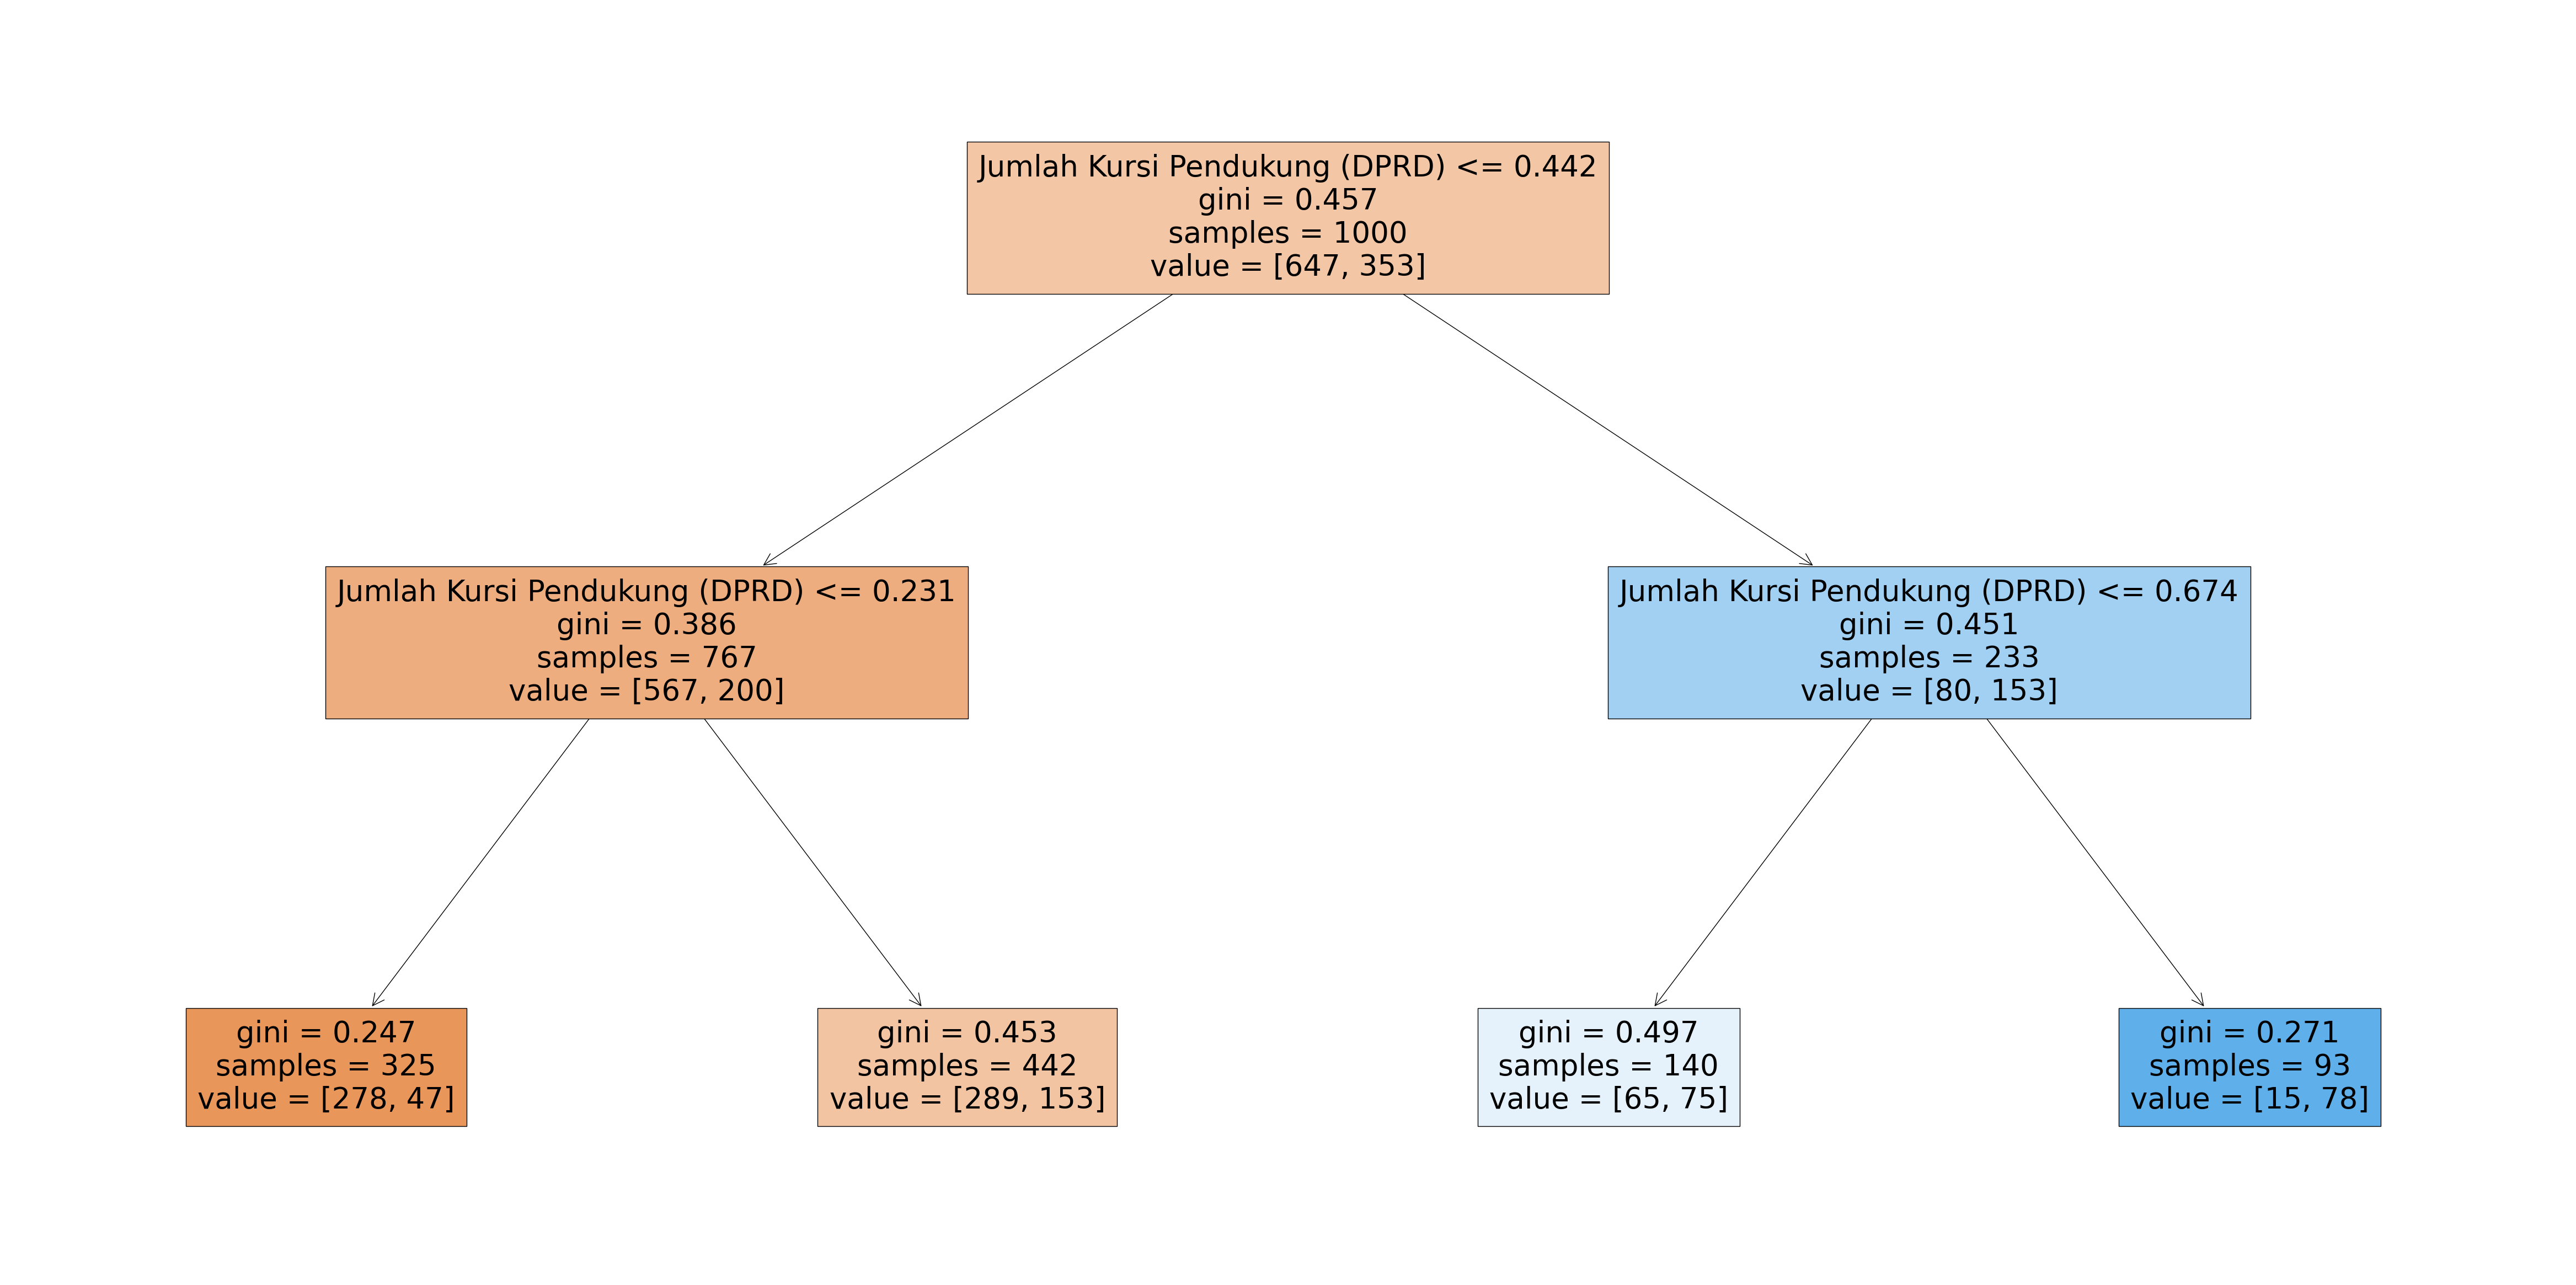

In [24]:
model_akurasi_tinggi = DecisionTreeClassifier(max_depth=2, criterion='gini')
model_akurasi_tinggi.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(60, 30))
plot_tree(model_akurasi_tinggi, feature_names=X_train.columns, filled=True)
plt.show()